One Class SVM is a novelty anomaly detection algorithm based on the premise that the training data is not polluted by the outliers and a new observation is detected as an inlier or an outlier. OCSVM is applied for binary classification


OCSVM assumes that anomalies can form dense clusters as long as they form a low-density region in the training dataset.
OCSVM mode is trained in only one class, referred to as the normal class. The model learns all the features and patterns of the normal class . When a new observation is introduced to the model, then based on its learning, the OCSVM detects if the new observation deviates from the normal behaviour then it classifies it as an oulier else the new observation will identified as an inlier.
OCSVM is based on Support Vector Machines where the binary classes are separated by a non-linear hyper plane



In [1]:
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where


In [2]:
df = pd.read_csv('/Users/reejungkim/Documents/python functions/creditcard 2.csv')


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


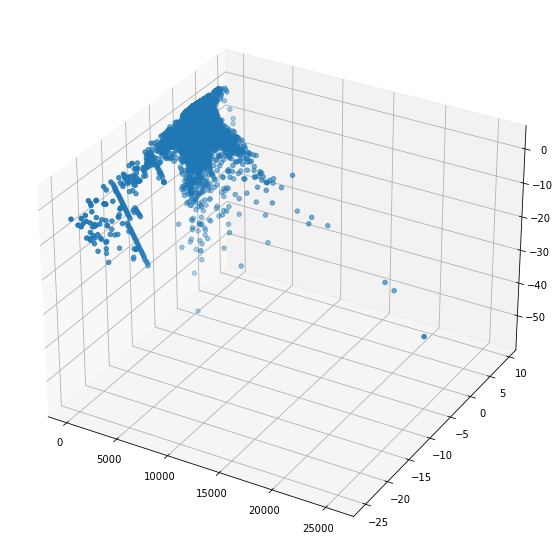

In [4]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

x= df.Amount
y= df.V17
z= df.V1

ax.scatter(x, y, z)
plt.show()

In [5]:
X = df.iloc[:, df.columns!='Class']
Y = df.iloc[:, df.columns=='Class']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=1)

df = df[['Amount','V17', 'V1']]

커널기법 적용. 비선형의 단점 보환. 
데이터를 확장하지 않고 확장된 특성에 대해 데이터 포인트들의 거리를 계산.

nu = 0.03 means that the algorithm will designate 3% data as outliers.

Hyperparameter “nu” controls the sensitivity of the support vectors and should be tuned to the approximate ratio of outliers in the data.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel function ‘rbf’ (radial basis function), ‘poly’ and ‘sigmoid’. 

In [8]:
# model specification
model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(model)

OneClassSVM(gamma=0.001, nu=0.03)


In [ ]:
model.fit(X_train, y_train)

- Inlier Prediction: +1
- Outlier Prediction: -1


In [ ]:
# prediction
y_train_pred = model.predict(X_train)
y_train_pred

In [ ]:
anom_index

In [ ]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

#visualize outputs
plt.scatter(df['Amount'] , df["V17"], df["V1"])
plt.scatter(outlier_values["Amount"], outlier_values["V17"], outlier_values["V1"], c = "r")


#calculate score
score = f1_score(testy, ypred, pos_label=-1)
print('F1 Score: %.3f' % score)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

x= df.Amount
y= df.V17
z= df.V1

plt.scatter(outlier_values["Amount"], outlier_values["V17"],outlier_values["V1"], c = "r")

ax.scatter(x, y, z)
plt.show()

In [ ]:
scores = model.score_samples(df)


In [ ]:
from numpy import quantile
thresh = quantile(scores, 0.03)
print(thresh)